# MS2860 Assignment1 Solutions Sheet
###### © Shivam Rathaur 2024
---------------------------

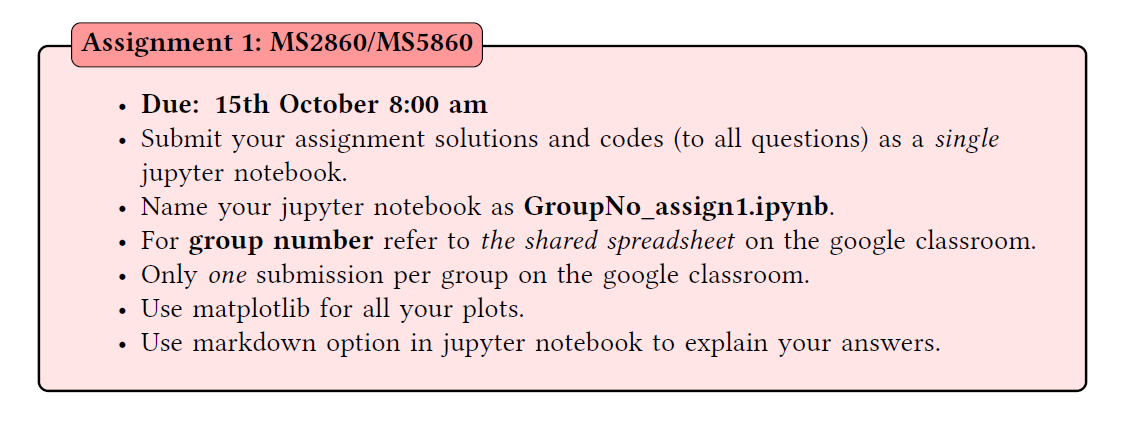

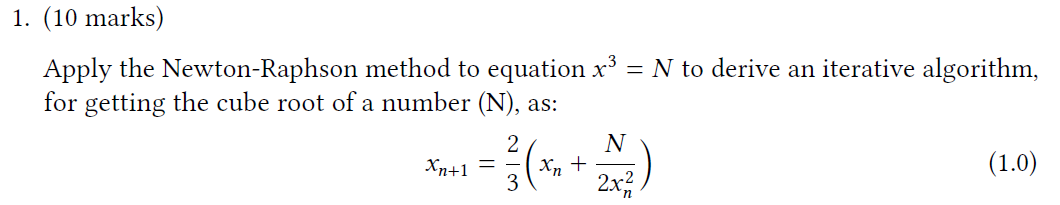

Solution:  
  
  We have,

  $$ x^3 = N $$

  On rearranging,

  $$ f(x) = x^3-N=0 $$

  Applying Newton-Raphson formula to calculate $x_{n+1}$ from $x_n$

  $$ x_{n+1} = x_n - \frac{f(x)}{f'(x)} $$

  $$ x_{n+1} = x_n - \frac{x_n^3-N}{3x_n^2} $$

  $$ x_{n+1} = \frac{3x_n^3-x_n^3+N}{3x_n^2} $$

  $$ x_{n+1} = \frac{2x_n^3+N}{3x_n^2} $$

  $$ x_{n+1} = \frac{2x_n^2}{3} + \frac{N}{3x_n^2} $$

  Thus,

  $$ x_{n+1} = \frac{2}{3} \left( x_n + \frac{N}{2 x_n^2} \right) $$
  

--------------------------------------------

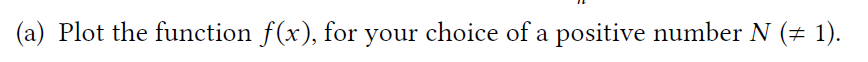

Part(a):

  Taking N = 3,
    
  $$ f(x) = x^3 - 3 $$  

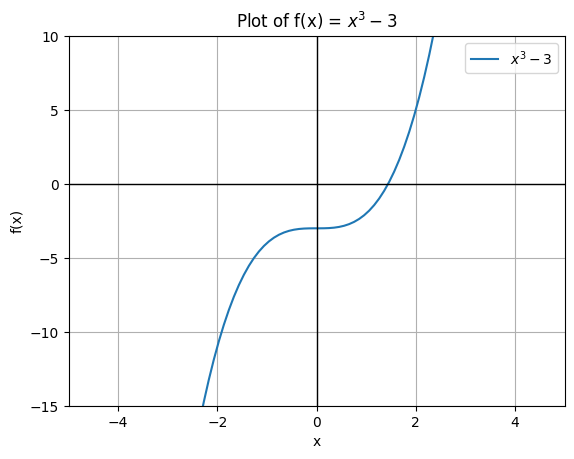

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - 3

# Generate a range of x values
x = np.linspace(-5, 5, 100)

# Compute corresponding y values
y = f(x)

# Plot the function
plt.plot(x, y, label=r"$x^3 - 3$")
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.title(r"Plot of f(x) = $x^3 - 3$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.xlim(-5, 5)
plt.ylim(-15, 10)
plt.grid(True)
plt.show()

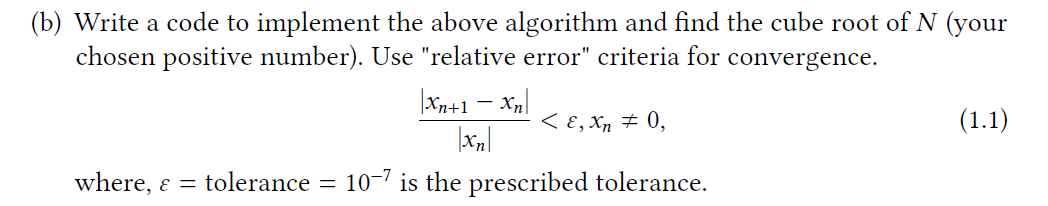

Part(b):

In [ ]:
# Newton-Raphson method (Single-point method)

# define function and its derivative
def f(x):
    return x**3 - 3

def df(x):
    return 3*x**2

def newton(f, df, x1, tol):
    #manually-hard-code to run for specific iterations
    for i in range(500):
        x2 = x1 - f(x1)/df(x1)
        if abs(f(x2)) < tol:
            print('found root')
            return x2
            break
        x1 = x2

    print('root not found')

##choose a starting value of x
x1 = 6

root = newton(f, df, x1, tol=1e-7)

print('root =', root)
print('func val =,', f(root))

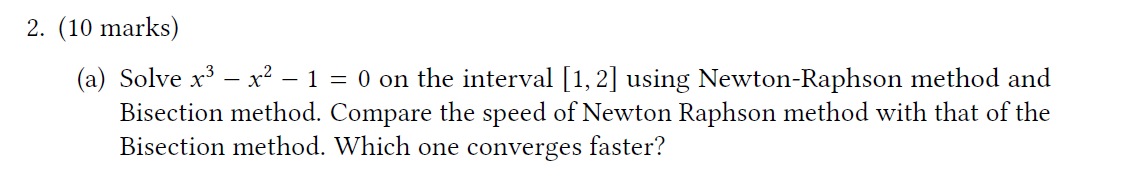

# Using Newton-Raphson Method:

In [35]:
# Code of Newton's Method
from math import fabs
def newton(f, f1, x0, tol = 1e-6):
    for i in range(500):
        x = x0 - f(x0)/f1(x0)
        if fabs(f(x)) < tol:
            return f"root at {x:.5f} found in {i + 1} iterations"
        x0 = x
    return f"could not find in {i + 1} iterations, final value: {f(x)} at x = {x:.5f}"

In [36]:
# defining the functions
def f(x):
    return x**3 - x**2 - 1

def df(x):
    return 3*x**2 - 2*x

# Choose a starting value of x
x0 = 2

# calling the function
print(newton(f, df, x0))

root at 1.46557 found in 4 iterations


# Using Bisection Method:

In [37]:
# code of bisection method
def bisection(f, x0, x1, tol = 1e-6):
    for i in range(500):
        x = (x0 + x1) / 2
        if fabs(f(x)) < tol:
            return f"root at {x:.5f} found in {i + 1} iterations"
        if f(x)*f(x0) < 0:
            x1 = x
        else:
            x0 = x
    return f"could not find in {i + 1} iterations, final value: {f(x)} at x = {x:.5f}"

In [38]:
# defining the functions
def f(x):
    return x**3 - x**2 - 1

def df(x):
    return 3*x**2 - 2*x

In [39]:
# Choosing the range
x0, x1 = 1, 2
tol = 1e-6
bisection(f, x0, x1, tol)

'root at 1.46557 found in 20 iterations'

* Newton-Raphson Method is faster than the Bisection Method.
* Newton-Raphson Method took 4 iterations while Bisection Method took 20 iterations.
* Hence, Newton-Raphson Method converges faster.


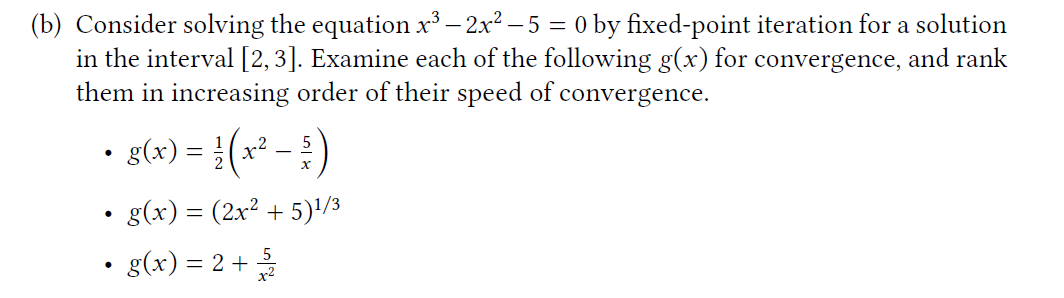

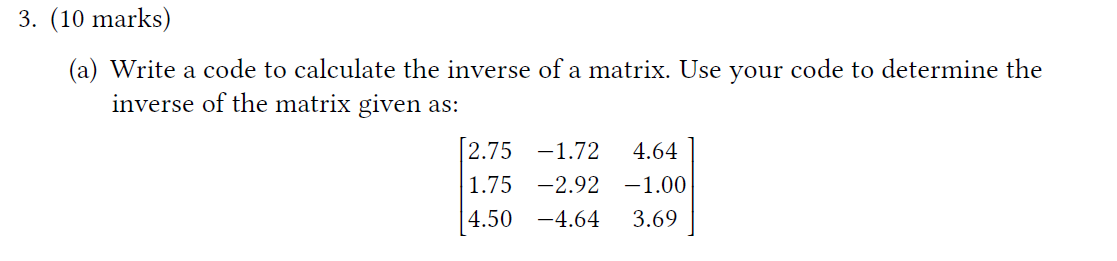

In [40]:
def get_matrix_minor(matrix, row, col):
    """Return the minor of the matrix after removing the specified row and column."""
    return [r[:col] + r[col + 1:] for r in (matrix[:row] + matrix[row + 1:])]

In [41]:
def determinant(matrix):
    """Calculate the determinant of a matrix recursively."""
    if len(matrix) == 1:
        return matrix[0][0]
    if len(matrix) == 2:
        return matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]

    det = 0
    for c in range(len(matrix)):
        det += ((-1) ** c) * matrix[0][c] * determinant(get_matrix_minor(matrix, 0, c))
    return det

In [42]:
def inverse_matrix(matrix):
    """Calculate the inverse of a matrix using the determinant and minors."""
    det = determinant(matrix)
    if det == 0:
        raise ValueError("Matrix is singular and cannot be inverted.")

    # Find the matrix of minors
    minors = []
    for r in range(len(matrix)):
        minor_row = []
        for c in range(len(matrix)):
            minor = determinant(get_matrix_minor(matrix, r, c))
            minor_row.append(((-1) ** (r + c)) * minor)  # Apply cofactor
        minors.append(minor_row)

    # Transpose the cofactor matrix to get the adjugate
    cofactors_transposed = list(map(list, zip(*minors)))

    # Divide by the determinant to get the inverse and round off to 2 decimal places
    inverse = [[round(cofactors_transposed[r][c] / det, 2) for c in range(len(cofactors_transposed))] for r in range(len(cofactors_transposed))]

    return inverse

In [44]:
# Given 3x3 matrix
matrix = [
    [2.75, -1.72, 4.64],
    [1.75, -2.92, -1.00],
    [4.50, -4.64, 3.69]
]

inverse = inverse_matrix(matrix)

print("Original matrix:")
for row in matrix:
    print(row)

print("\nInverse matrix (rounded to 2 decimal places):")
for row in inverse:
    print(row)

Original matrix:
[2.75, -1.72, 4.64]
[1.75, -2.92, -1.0]
[4.5, -4.64, 3.69]

Inverse matrix (rounded to 2 decimal places):
[61.41, 60.49, -60.83]
[43.66, 42.76, -43.31]
[-20.0, -20.0, 20.0]


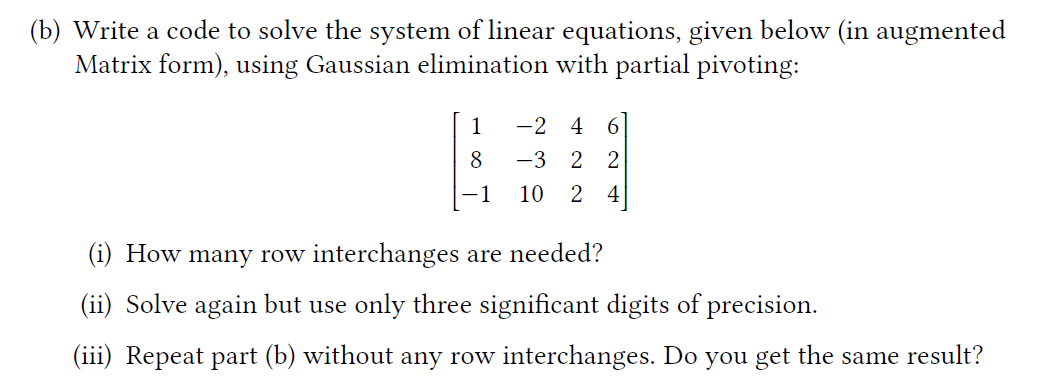